# Predict Students Dropout and Academic Success

In [293]:
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


In [2]:
data = pd.read_csv('teja')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [4]:
print(data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [5]:
data['Course']=data['Course'].astype('category')
data['Marital status']=data['Marital status'].astype('category')
data['Application mode']=data['Application mode'].astype('category')
data['Application order']=data['Application order'].astype('category')
data['Daytime/evening attendance\t']=data['Daytime/evening attendance\t'].astype('category')
data['Previous qualification']=data['Previous qualification'].astype('category')
data['Nacionality']=data['Nacionality'].astype('category')
#data['Mothers qualification']=data['Mothers qualification'].astype('category')
#data['Fathers qualification']=data['Fathers qualification '].astype('category')
#data['Mothers occupation']=data['Mothers occupation'].astype('category')
#data['Fathers occupation']=data['Fathers occupation'].astype('category')
data['Displaced']=data['Displaced'].astype('category')
data['Educational special needs']=data['Educational special needs'].astype('category')
data['Debtor']=data['Debtor'].astype('category')
data['Tuition fees up to date']=data['Tuition fees up to date'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['Scholarship holder']=data['Scholarship holder'].astype('category')
data['International']=data['International'].astype('category')


In [6]:
print(data.dtypes)

Marital status                                    category
Application mode                                  category
Application order                                 category
Course                                            category
Daytime/evening attendance\t                      category
Previous qualification                            category
Previous qualification (grade)                     float64
Nacionality                                       category
Mother's qualification                               int64
Father's qualification                               int64
Mother's occupation                                  int64
Father's occupation                                  int64
Admission grade                                    float64
Displaced                                         category
Educational special needs                         category
Debtor                                            category
Tuition fees up to date                           catego

In [7]:
data["Mother's qualification"]=data["Mother's qualification"].astype('category')
data["Father's qualification"]=data["Father's qualification"].astype('category')
data["Mother's occupation"]=data["Mother's occupation"].astype('category')
data["Father's occupation"]=data["Father's occupation"].astype('category')

In [7]:
print(data.dtypes)

Marital status                                    category
Application mode                                  category
Application order                                 category
Course                                            category
Daytime/evening attendance\t                      category
Previous qualification                            category
Previous qualification (grade)                     float64
Nacionality                                       category
Mother's qualification                            category
Father's qualification                            category
Mother's occupation                               category
Father's occupation                               category
Admission grade                                    float64
Displaced                                         category
Educational special needs                         category
Debtor                                            category
Tuition fees up to date                           catego

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

# exploration of data

In [9]:
  data.groupby('Gender').count()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Gender,,,,,,,,,,,,,,,,,,,,,
0,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868,...,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868
1,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,...,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556


In [10]:
data.groupby('Marital status').count()

,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,,,,,,,,,,,,,,,,,,,,,
1,3919,3919,3919,3919,3919,3919,3919,3919,3919,3919,...,3919,3919,3919,3919,3919,3919,3919,3919,3919,3919
2,379,379,379,379,379,379,379,379,379,379,...,379,379,379,379,379,379,379,379,379,379
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
5,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [11]:
data.groupby(['Marital status','Gender']).count()

Application mode  Application order  Course  \
Marital status Gender                                                
1              0                   2552               2552    2552   
               1                   1367               1367    1367   
2              0                    221                221     221   
               1                    158                158     158   
3              0                      3                  3       3   
               1                      1                  1       1   
4              0                     69                 69      69   
               1                     22                 22      22   
5              0                     18                 18      18   
               1                      7                  7       7   
6              0                      5                  5       5   
               1                      1                  1       1   

                       Daytime/evening attendance\t  Previous qualification  \
Marital status Gender                                                         
1              0                               2552                    2552   
               1                               1367                    1367   
2              0                                221                     221   
               1                                158                     158   
3              0                                  3                       3   
               1                                  1                       1   
4              0                                 69                      69   
               1                                 22                      22   
5              0                                 18                      18   
               1                                  7                       7   
6              0                                  5                       5   
               1                                  1                       1   

                       Previous qualification (grade)  Nacionality  \
Marital status Gender                                                
1              0                                 2552         2552   
               1                                 1367         1367   
2              0                                  221          221   
               1                                  158          158   
3              0                                    3            3   
               1                                    1            1   
4              0                                   69           69   
               1                                   22           22   
5              0                                   18           18   
               1                                    7            7   
6              0                                    5            5   
               1                                    1            1   

                       Mother's qualification  Father's qualification  \
Marital status Gender                                                   
1              0                         2552                    2552   
               1                         1367                    1367   
2              0                          221                     221   
               1                          158                     158   
3              0                            3                       3   
               1                            1                       1   
4              0                           69                      69   
               1                           22                      22   
5              0                           18                      18   
               1                            7                       7   
6              0                            5                       5   
     

In [11]:
data.groupby(['Marital status','Gender','Scholarship holder']).count()

Application mode  Application order  \
Marital status Gender Scholarship holder                                        
1              0      0                               1738               1738   
                      1                                814                814   
               1      0                               1148               1148   
                      1                                219                219   
2              0      0                                194                194   
                      1                                 27                 27   
               1      0                                149                149   
                      1                                  9                  9   
3              0      0                                  2                  2   
                      1                                  1                  1   
               1      0                                  1                  1   
                      1                                  0                  0   
4              0      0                                 48                 48   
                      1                                 21                 21   
               1      0                                 21                 21   
                      1                                  1                  1   
5              0      0                                 16                 16   
                      1                                  2                  2   
               1      0                                  4                  4   
                      1                                  3                  3   
6              0      0                                  3                  3   
                      1                                  2                  2   
               1      0                                  1                  1   
                      1                                  0                  0   

                                          Course  \
Marital status Gender Scholarship holder           
1              0      0                     1738   
                      1                      814   
               1      0                     1148   
                      1                      219   
2              0      0                      194   
                      1                       27   
               1      0                      149   
                      1                        9   
3              0      0                        2   
                      1                        1   
               1      0                        1   
                      1                        0   
4              0      0                       48   
                      1                       21   
               1      0                       21   
                      1                        1   
5              0      0                       16   
                      1                        2   
               1      0                        4   
                      1                        3   
6              0      0                        3   
                      1                        2   
               1      0                        1   
                      1                        0   

                                          Daytime/evening attendance\t  \
Marital status Gender Scholarship holder                                 
1              0      0                                           1738   
                      1                                            814   
               1      0                                           1148   
                      1                                            219   
2              0      0                                            194   
                      1                                         

<Axes: ylabel='Marital status'>

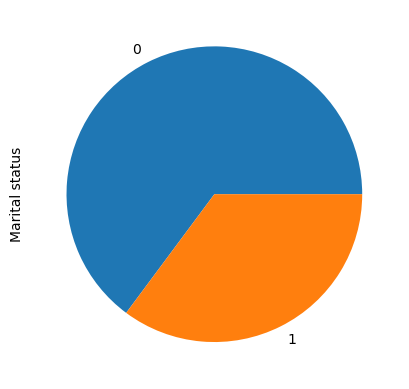

In [12]:
data.groupby('Gender').count()['Marital status'].plot.pie()

<Axes: ylabel='Target'>

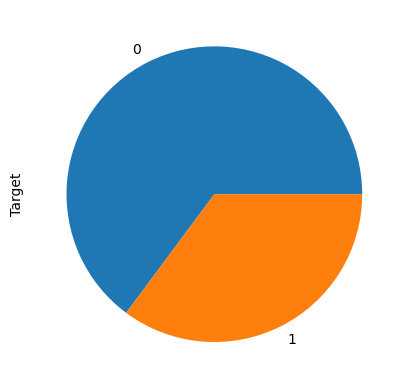

In [13]:
data.groupby('Gender').count()['Target'].plot.pie()

In [14]:
from sklearn import preprocessing

In [15]:
%matplotlib inline

import itertools
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [16]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [17]:
data.groupby(['Marital status','Gender','Scholarship holder','Target']).count()

Application mode  \
Marital status Gender Scholarship holder Target                       
1              0      0                  Dropout                508   
                                         Enrolled               352   
                                         Graduate               878   
                      1                  Dropout                 83   
                                         Enrolled                81   
...                                                             ...   
6              1      0                  Enrolled                 0   
                                         Graduate                 0   
                      1                  Dropout                  0   
                                         Enrolled                 0   
                                         Graduate                 0   

                                                   Application order  Course  \
Marital status Gender Scholarship holder Target                                
1              0      0                  Dropout                 508     508   
                                         Enrolled                352     352   
                                         Graduate                878     878   
                      1                  Dropout                  83      83   
                                         Enrolled                 81      81   
...                                                              ...     ...   
6              1      0                  Enrolled                  0       0   
                                         Graduate                  0       0   
                      1                  Dropout                   0       0   
                                         Enrolled                  0       0   
                                         Graduate                  0       0   

                                                   Daytime/evening attendance\t  \
Marital status Gender Scholarship holder Target                                   
1              0      0                  Dropout                            508   
                                         Enrolled                           352   
                                         Graduate                           878   
                      1                  Dropout                             83   
                                         Enrolled                            81   
...                                                                         ...   
6              1      0                  Enrolled                             0   
                                         Graduate                             0   
                      1                  Dropout                              0   
                                         Enrolled                             0   
                                         Graduate                             0   

                                                   Previous qualification  \
Marital status Gender Scholarship holder Target                             
1              0      0                  Dropout                      508   
                                         Enrolled                     352   
                                         Graduate                     878   
                      1                  Dropout                       83   
                                         Enrolled                      81   
...                                                                   ...   
6              1      0                  Enrolled                       0   
                                         Graduate                       0   
                      1                  Dropout                        0   
                                         Enrolled                       0   
                                         Graduate                       0   

    

In [18]:
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(index=data['Gender'],columns=data['Target'])
print(cross_tab)

Target  Dropout  Enrolled  Graduate
Gender                             
0           720       487      1661
1           701       307       548


In [19]:
chi_sq_result = chi2_contingency(cross_tab,)
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
 
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")


The p-value is 2.2224795668092454e-51 and hence we reject the null Hpothesis with 2 degrees of freedom


In [20]:
from scipy.stats import chi2_contingency
cross_tab1=pd.crosstab(index=data['Marital status'],columns=data['Target'])
print(cross_tab1)

Target          Dropout  Enrolled  Graduate
Marital status                             
1                  1184       720      2015
2                   179        52       148
3                     1         2         1
4                    42        16        33
5                    11         3        11
6                     4         1         1


In [21]:
chi_sq_result = chi2_contingency(cross_tab1,)
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"
 
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")


The p-value is 8.054279703889306e-10 and hence we reject the null Hpothesis with 10 degrees of freedom


In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
x=data.drop(['Inflation rate','GDP'],axis=1)

In [24]:
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0,0,0,0,0,0.000000,0,10.8,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,14.000000,0,0,6,6,6,13.666667,0,13.9,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0,0,6,0,0,0.000000,0,10.8,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,13.428571,0,0,6,10,5,12.400000,0,9.4,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,12.333333,0,0,6,6,6,13.000000,0,13.9,Graduate


In [24]:
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,0,0,0,0,0.000000,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,14.000000,0,0,6,6,6,13.666667,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,0,6,0,0,0.000000,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,8,6,13.428571,0,0,6,10,5,12.400000,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,9,5,12.333333,0,0,6,6,6,13.000000,0


In [25]:
y.head()

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

# feature selection 

In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [28]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns

In [29]:
featureScores

,features,Score
0,Marital status,12.244640
1,Application mode,3567.944852
2,Application order,39.082387
3,Course,2566.498834
4,Daytime/evening attendance\t,3.137746
5,Previous qualification,318.559473
6,Previous qualification (grade),71.867554
7,Nacionality,42.690595
8,Mother's qualification,317.474682
9,Father's qualification,81.027746


In [31]:
print(featureScores.nlargest(15,'Score')) 

                                  features        Score
31        Curricular units 2nd sem (grade)  3980.634363
1                         Application mode  3567.944852
30     Curricular units 2nd sem (approved)  3530.526536
3                                   Course  2566.498834
24     Curricular units 1st sem (approved)  2519.752869
25        Curricular units 1st sem (grade)  2379.656478
10                     Mother's occupation  1247.907383
11                     Father's occupation  1033.829580
19                       Age at enrollment   715.976606
29  Curricular units 2nd sem (evaluations)   326.618731
5                   Previous qualification   318.559473
8                   Mother's qualification   317.474682
18                      Scholarship holder   308.105936
15                                  Debtor   229.847548
23  Curricular units 1st sem (evaluations)   155.384284


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [33]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00708095 0.02950102 0.01988869 0.03296193 0.0060119  0.00948311
 0.03386013 0.00324495 0.02910451 0.02790973 0.03062608 0.0320106
 0.03402323 0.01558215 0.00240538 0.01858571 0.06060741 0.01909852
 0.02961744 0.03565528 0.0031434  0.00963473 0.02594399 0.03876512
 0.0667852  0.07717165 0.00935086 0.00792685 0.02427166 0.03995858
 0.11056139 0.10042368 0.00880417]


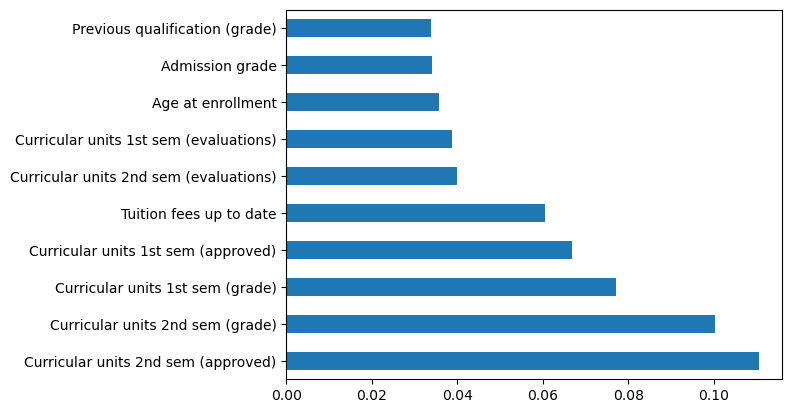

In [34]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# labelling TARGET VARIBALE AS "CODE" AS 0,1,2

In [60]:
data2 = pd.read_csv('teja')
data2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [42]:
from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder()
data2['Code'] = le.fit_transform(data2.Target)
data2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Code
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


In [43]:
data3=data2.drop(['Target','Inflation rate','GDP'],axis=1)

In [44]:
data3.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Code
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0,0,0,0,0,0.000000,0,10.8,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,14.000000,0,0,6,6,6,13.666667,0,13.9,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0,0,6,0,0,0.000000,0,10.8,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,13.428571,0,0,6,10,5,12.400000,0,9.4,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,12.333333,0,0,6,6,6,13.000000,0,13.9,2


# Here target is encoded as CODE(0,1,2) here you can see the CODE is correlated with Curricular units 2nd sem Application mode, Curricular units 2nd sem (approved) ,Course Curricular units 1st sem (approved) ,Curricular units 1st sem (grade)   Mother's occupation    Father's occupation  Age at enrollment   715.976606  Curricular units 2nd sem (evaluations) Previous qualification, Mother's qualification,Scholarship holder ,Debtor Curricular units 1st sem (evaluations)   

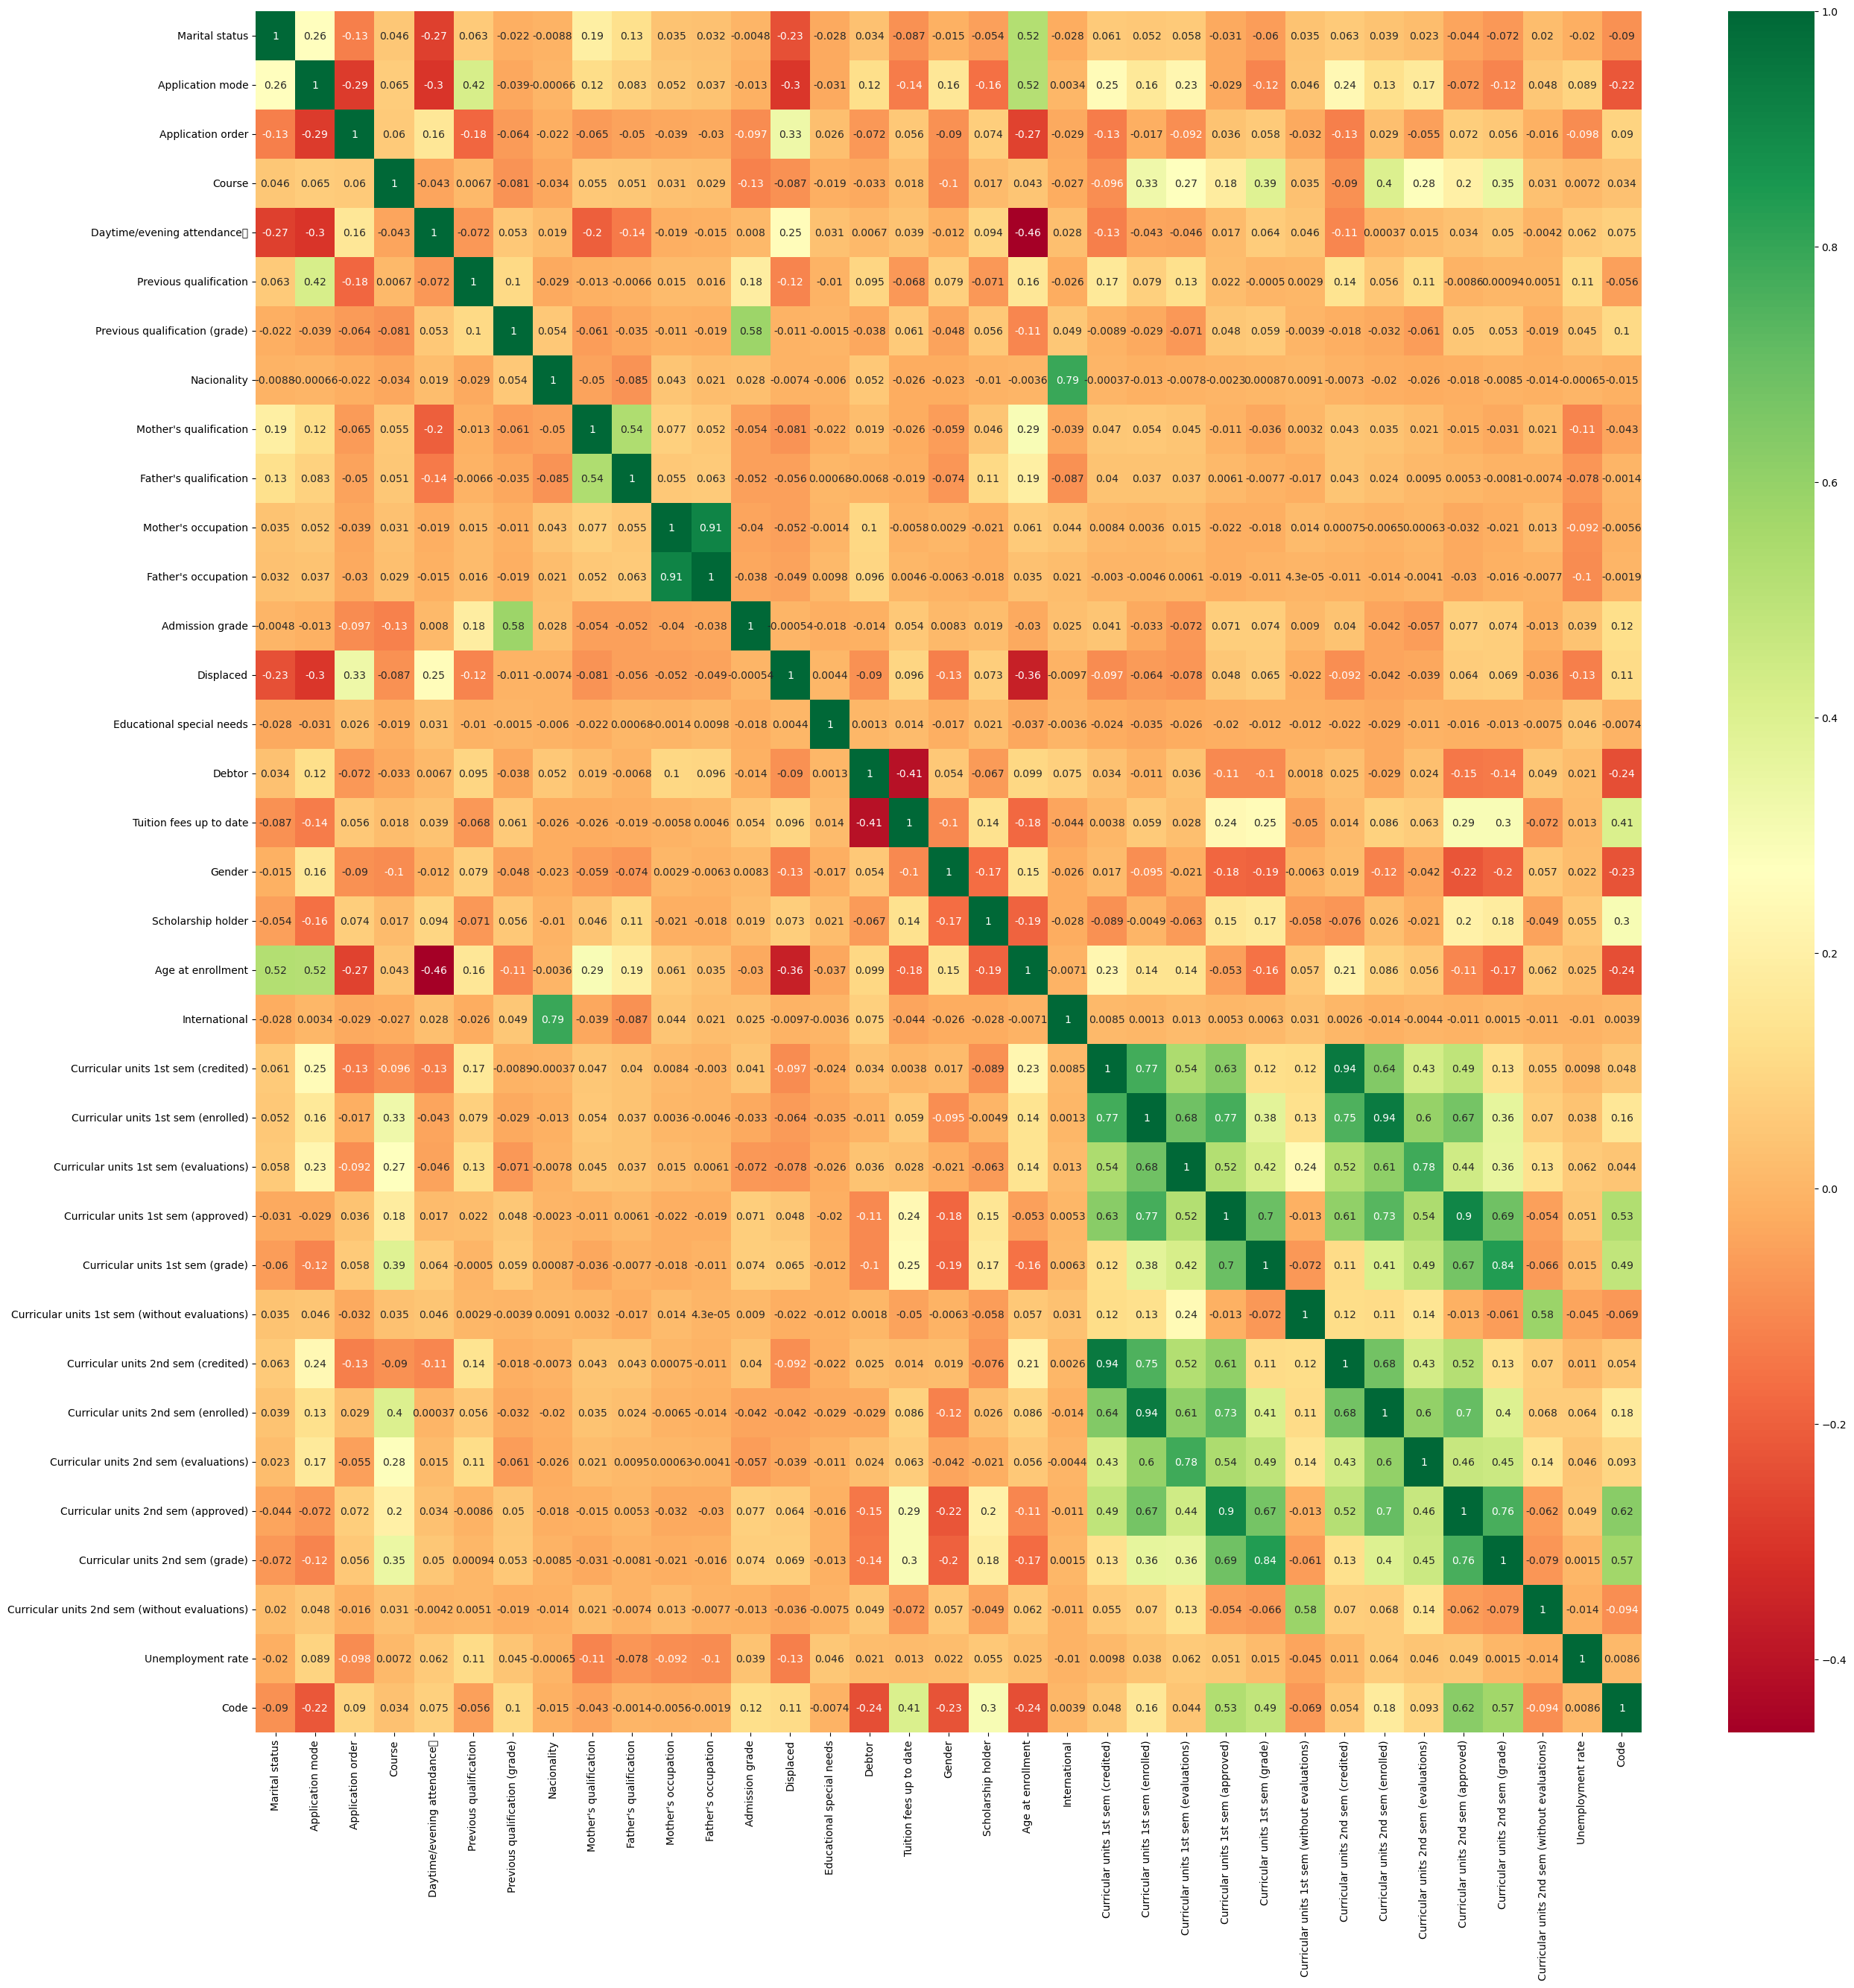

In [47]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [52]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf



In [53]:
from tensorflow import keras
from keras.layers import Dense

In [113]:
data1 = pd.read_csv('teja',header=None,index_col=False)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,17,5,171,1,1,122,1,19,12,...,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
2,1,15,1,9254,1,1,160,1,1,3,...,0,6,6,6,13.66666667,0,13.9,-0.3,0.79,Graduate
3,1,1,5,9070,1,1,122,1,37,37,...,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
4,1,17,2,9773,1,1,122,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate


In [109]:
data1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [268]:
columns=[1,3,8,11,15,18,19,23,24,25,29,30,31]
p=data1[columns]


In [71]:
for feature in train_set.columns[:]:
    print(feature,":",len(p[feature].unique()),'labels')

1 : 19 labels
3 : 18 labels
8 : 30 labels
11 : 47 labels
15 : 3 labels
18 : 3 labels
19 : 47 labels
23 : 36 labels
24 : 24 labels
25 : 798 labels
29 : 31 labels
30 : 21 labels
31 : 783 labels


In [81]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [114]:
from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder()
data['Code_le'] = le.fit_transform(data.Target)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Code_le
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [73]:
for feature in p.columns[:]:
    print(feature,":",len(p[feature].unique()),'labels')

1 : 19 labels
3 : 18 labels
8 : 30 labels
11 : 47 labels
15 : 3 labels
18 : 3 labels
19 : 47 labels
23 : 36 labels
24 : 24 labels
25 : 798 labels
29 : 31 labels
30 : 21 labels
31 : 783 labels


In [147]:
data2 = pd.read_csv('teja')
data2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [148]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [149]:
from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder()
data2['Code_le'] = le.fit_transform(data2.Target)
data2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Code_le
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


# best features=1 3 8 11 15 18 19 23 24 25 29 30 31(column names)

# neural networks

In [150]:
x = data2.iloc[:,[1,3,8,11,15,18,19,23,24,25,29,30,31]]  #independent columns

In [152]:
y= data2.iloc[:,-1]    #target 

In [153]:
y.head()

0    0
1    2
2    0
3    2
4    2
Name: Code_le, dtype: int32

In [154]:
x.head()

,Application mode,Course,Mother's qualification,Father's occupation,Debtor,Scholarship holder,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,17,171,19,9,0,0,20,0,0,0.000000,0,0,0.000000
1,15,9254,1,3,0,0,19,6,6,14.000000,6,6,13.666667
2,1,9070,37,9,0,0,19,0,0,0.000000,0,0,0.000000
3,17,9773,38,3,0,0,20,8,6,13.428571,10,5,12.400000
4,39,8014,37,9,0,0,45,9,5,12.333333,6,6,13.000000


In [155]:
data4 = data2.iloc[:,[1,3,8,11,15,18,19,23,24,25,29,30,31,37]] 

In [156]:
data4.head()

,Application mode,Course,Mother's qualification,Father's occupation,Debtor,Scholarship holder,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Code_le
0,17,171,19,9,0,0,20,0,0,0.000000,0,0,0.000000,0
1,15,9254,1,3,0,0,19,6,6,14.000000,6,6,13.666667,2
2,1,9070,37,9,0,0,19,0,0,0.000000,0,0,0.000000,0
3,17,9773,38,3,0,0,20,8,6,13.428571,10,5,12.400000,2
4,39,8014,37,9,0,0,45,9,5,12.333333,6,6,13.000000,2


In [157]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application mode                        4424 non-null   int64  
 1   Course                                  4424 non-null   int64  
 2   Mother's qualification                  4424 non-null   int64  
 3   Father's occupation                     4424 non-null   int64  
 4   Debtor                                  4424 non-null   int64  
 5   Scholarship holder                      4424 non-null   int64  
 6   Age at enrollment                       4424 non-null   int64  
 7   Curricular units 1st sem (evaluations)  4424 non-null   int64  
 8   Curricular units 1st sem (approved)     4424 non-null   int64  
 9   Curricular units 1st sem (grade)        4424 non-null   float64
 10  Curricular units 2nd sem (evaluations)  4424 non-null   int6

In [130]:
y.describe()

count    4424.000000
mean        1.178119
std         0.888243
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Code_le, dtype: float64

In [131]:
x.describe()

,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,8.299051,4.706600,10.640822,8.063291,4.435805,10.230206
std,7.587816,4.179106,3.094238,4.843663,3.947951,3.014764,5.210808
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,3.000000,11.000000,6.000000,2.000000,10.750000
50%,20.000000,8.000000,5.000000,12.285714,8.000000,5.000000,12.200000
75%,25.000000,10.000000,6.000000,13.400000,10.000000,6.000000,13.333333
max,70.000000,45.000000,26.000000,18.875000,33.000000,20.000000,18.571429


In [159]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (2964, 13) (2964,)
Test (1460, 13) (1460,)


In [160]:
X_train.head()

,Application mode,Course,Mother's qualification,Father's occupation,Debtor,Scholarship holder,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
3352,39,9119,1,3,0,0,27,7,3,12.000000,7,2,11.000000
4018,17,9254,38,8,0,1,20,6,6,13.166667,6,6,14.000000
151,1,9085,1,7,0,0,19,6,5,12.400000,6,5,13.400000
1032,1,9773,37,8,0,0,18,7,6,13.428571,7,6,14.142857
460,1,9130,3,2,0,0,20,5,5,16.400000,5,5,14.600000


In [161]:
train_dataset, temp_test_dataset =  train_test_split(data4, test_size=0.2)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(3539, 14)
(885, 14)


In [162]:
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(442, 14)
(443, 14)


In [163]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (3539, 14)
 Test dataset       : (442, 14)
 Validation dataset : (443, 14)


In [164]:
train_labels1 = train_dataset.pop('Code_le')
test_labels1 = test_dataset.pop('Code_le')
valid_labels1 = valid_dataset.pop('Code_le')

In [165]:
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2
2815,0,0,1
4187,0,0,1
2006,0,0,1
584,0,0,1
627,0,0,1
...,...,...,...
958,0,0,1
3631,1,0,0
2545,0,0,1
1918,0,0,1


In [166]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Application mode,3539.0,18.931902,17.508365,1.0,1.0,17.000000,39.000000,57.000000
Course,3539.0,8866.442498,2044.940145,33.0,9085.0,9238.000000,9556.000000,9991.000000
Mother's qualification,3539.0,19.518508,15.573070,1.0,2.0,19.000000,37.000000,43.000000
Father's occupation,3539.0,11.030235,25.059893,0.0,4.0,7.000000,9.000000,195.000000
Debtor,3539.0,0.113309,0.317015,0.0,0.0,0.000000,0.000000,1.000000
Scholarship holder,3539.0,0.247528,0.431637,0.0,0.0,0.000000,0.000000,1.000000
Age at enrollment,3539.0,23.316191,7.573443,17.0,19.0,20.000000,25.000000,70.000000
Curricular units 1st sem (evaluations),3539.0,8.334558,4.192778,0.0,6.0,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),3539.0,4.706697,3.085074,0.0,3.0,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),3539.0,10.666700,4.826114,0.0,11.0,12.333333,13.400000,18.875000


# scaling the data

In [167]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [168]:
normed_train_data.head(10)

,Application mode,Course,Mother's qualification,Father's occupation,Debtor,Scholarship holder,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
2815,-0.110342,0.181696,1.122546,-0.240633,-0.357425,1.743300,-0.569911,0.635722,0.095072,0.193385,0.486382,0.521745,0.280268
4187,1.146201,-0.416854,1.122546,-0.160824,-0.357425,-0.573463,0.618452,-0.079794,0.095072,0.241733,-0.522590,0.521745,0.528256
2006,1.146201,-0.416854,1.122546,-0.120920,-0.357425,-0.573463,2.731097,-0.556804,0.419213,0.863352,-0.522590,0.521745,0.753282
584,-0.110342,0.189520,1.122546,-0.160824,-0.357425,-0.573463,-0.569911,-0.079794,0.095072,0.234827,-0.018104,0.187484,0.258225
627,-1.024191,0.309817,-0.033295,-0.160824,-0.357425,-0.573463,-0.569911,-0.079794,0.743354,0.488654,0.234139,1.190265,0.684703
21,-0.053226,0.337202,-1.189137,-0.160824,-0.357425,-0.573463,-0.437871,1.351238,0.743354,0.159714,0.234139,1.190265,0.224471
3383,-0.681497,0.137196,-0.033295,-0.240633,-0.357425,-0.573463,1.542734,-0.795310,-1.525635,-2.210204,-0.774833,-1.483817,-1.979176
2157,1.431778,0.106877,1.122546,-0.041111,-0.357425,-0.573463,-0.173790,1.112733,0.419213,0.897886,-0.270347,0.521745,0.555810
4122,-0.110342,0.181696,-0.033295,-0.160824,-0.357425,-0.573463,-0.569911,-0.318299,0.095072,0.027621,0.234139,0.521745,-0.018236
2608,-0.110342,0.189520,1.186760,-0.240633,-0.357425,-0.573463,-0.437871,-0.556804,0.419213,0.069062,-0.018104,-0.146776,0.480036


In [169]:
from sklearn.preprocessing import StandardScaler



In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [206]:
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)
from tensorflow.keras.callbacks import EarlyStopping

# epochs=100
#hidden layers=2
#one is relu and other is softmax
#learning rate=0.00001
#optimizers=adam
#early stopping for over fitting in training data




In [255]:
%%time
def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated       
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # Output layer => output dimension = 1 since it is a regression problem
     # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.00001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',#from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model


EPOCHS = 100
batch_size = 16 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10)


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )

Here is a summary of this model: 
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 32)                448       
                                                                 
 dense_91 (Dense)            (None, 32)                1056      
                                                                 
 dense_92 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
221/221 [==============================] - 0s 1ms/step - loss: 1.0737 - accuracy: 0.4737 - val_loss: 1.0444 - val_accuracy: 0.4944
Epoch 2/100
221/221 [==============================] - 0s 1ms/step - loss: 1.0379 - accuracy: 0.4976 - val_loss: 1.0079 - val_accuracy: 0.

In [256]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.613734,0.751348,0.641779,0.733634,95
96,0.630589,0.739427,0.641705,0.733634,96
97,0.616630,0.752484,0.641228,0.735892,97
98,0.617447,0.754754,0.641168,0.735892,98
99,0.632095,0.739710,0.641390,0.731377,99


In [257]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 [==============================] - 0s 25ms/step
predicted values: 


array([[0.14555831, 0.1823134 , 0.67212826],
       [0.94808644, 0.04877065, 0.00314284],
       [0.02011221, 0.08153266, 0.89835507],
       [0.2680298 , 0.38633355, 0.34563664],
       [0.05700368, 0.08177239, 0.86122394],
       [0.52409077, 0.40299097, 0.07291824],
       [0.27895752, 0.33461323, 0.38642925],
       [0.3285789 , 0.3701095 , 0.30131164],
       [0.7827584 , 0.21061032, 0.00663128],
       [0.06549293, 0.45204893, 0.48245814]], dtype=float32)

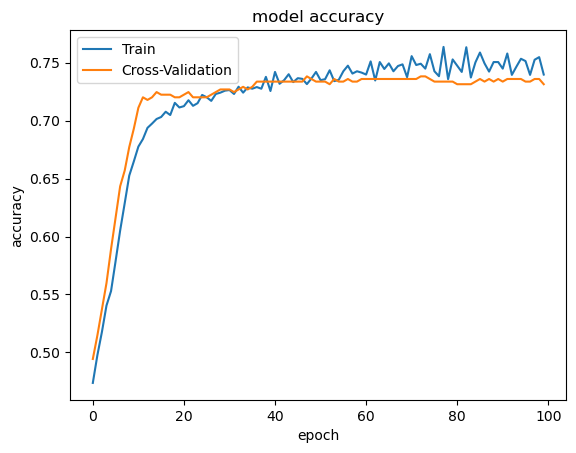

In [258]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

# model accuracy

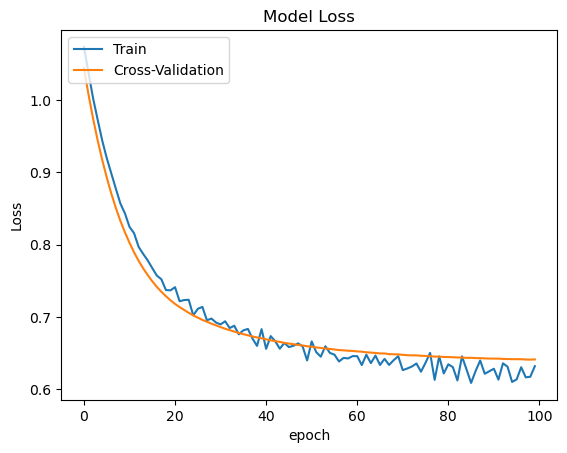

In [259]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [260]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
111/111 [==============================] - 0s 647us/step - loss: 0.6208 - accuracy: 0.7491
Accuracy   :  0.75 


In [261]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
14/14 - 0s - loss: 0.6414 - accuracy: 0.7314 - 17ms/epoch - 1ms/step
Accuracy   :  0.73 


In [262]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
14/14 - 0s - loss: 0.6060 - accuracy: 0.7557 - 24ms/epoch - 2ms/step
Accuracy   :  0.76


14/14 [==============================] - 0s 858us/step


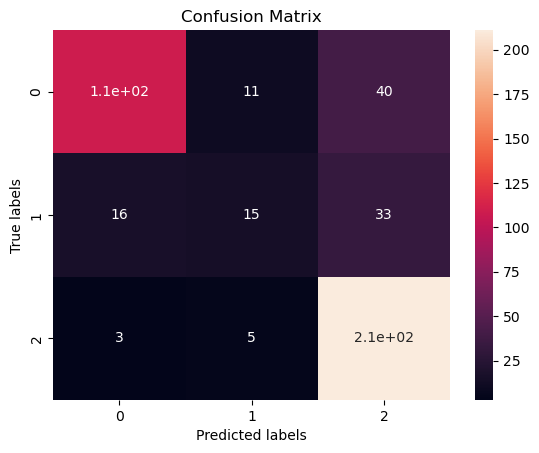

In [263]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

# predict_results = (predict_results.argmax())
predict_results= predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [264]:
model.get_weights

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x000001B33F0A0370>>

In [265]:
model.summary() 

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 32)                448       
                                                                 
 dense_91 (Dense)            (None, 32)                1056      
                                                                 
 dense_92 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [280]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU

from tensorflow.keras.layers import Dropout
acc_table= {}
from sklearn.preprocessing import MinMaxScaler

In [275]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label') 
    if title:
        plt.title(title)
    plt.show()


def display_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm1=metrics.confusion_matrix(y_test, y_pred)
    labels = ['True Negative','False Positive','False Negative','True Positive']
    categories = [ 'Dropout(0)', 'Enrolled(1)', 'Graduate(2)']
    #auc = metrics.roc_auc_score(y_test, y_pred)
    test_acc = metrics.accuracy_score(y_test, y_pred)
    test_precision = metrics.precision_score(y_test, y_pred, average='weighted')
    test_recall = metrics.recall_score(y_test, y_pred, average='weighted')
    test_f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    
    make_confusion_matrix(cm1, group_names=labels,categories=categories, cmap='Blues')
    score = [test_acc, test_precision, test_recall, test_f1]
    print(f"Accuracy = {test_acc}")
    print(f"Precision = {test_precision}")
    print(f"Recall = {test_recall}")
    print(f"F1-Score = {test_f1}")
    return score

# decision tree

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       446
           1       0.30      0.34      0.32       264
           2       0.77      0.71      0.74       750

    accuracy                           0.63      1460
   macro avg       0.56      0.57      0.56      1460
weighted avg       0.64      0.63      0.63      1460



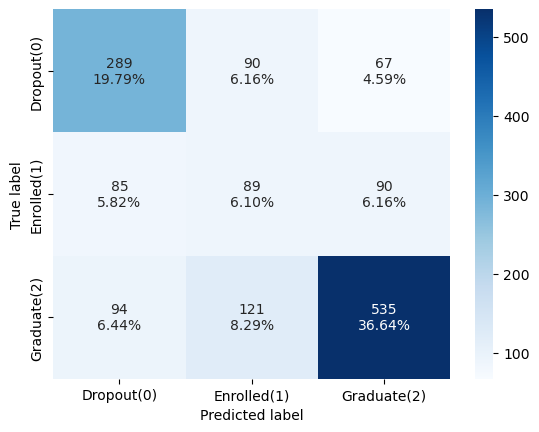

Accuracy = 0.6253424657534247
Precision = 0.6394353221759983
Recall = 0.6253424657534247
F1-Score = 0.6314257784977884


In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics


model_2_1 = DecisionTreeClassifier(random_state=1)
model_2_1.fit(X_train,y_train)

print(metrics.classification_report(y_test, model_2_1.predict(X_test)))

score_2_1 = display_confusion_matrix(model_2_1, X_test, y_test)
acc_table['Model 2-1 : Decision Tree'] = score_2_1

# random forest

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       446
           1       0.46      0.29      0.36       264
           2       0.80      0.92      0.85       750

    accuracy                           0.75      1460
   macro avg       0.67      0.65      0.65      1460
weighted avg       0.72      0.75      0.73      1460



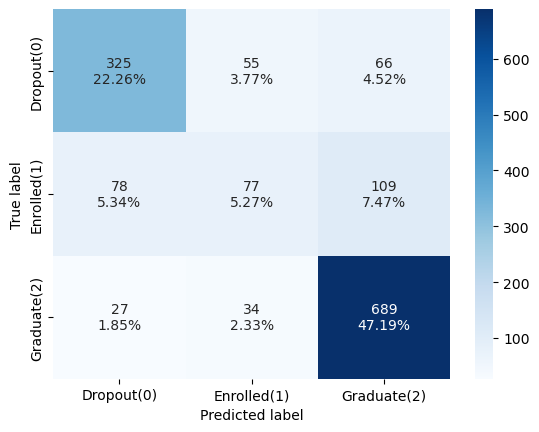

Accuracy = 0.7472602739726028
Precision = 0.7244117344923924
Recall = 0.7472602739726028
F1-Score = 0.7300133443557324


In [276]:
from sklearn.ensemble import RandomForestClassifier


model_3_1 = RandomForestClassifier(random_state=1)
model_3_1.fit(X_train, y_train)

print(metrics.classification_report(y_test, model_3_1.predict(X_test)))

score_3_1 = display_confusion_matrix(model_3_1, X_test, y_test)
acc_table['Model 3-1 : RandomForest'] = score_3_1

# svm

In [302]:
data2 = pd.read_csv('teja')
data2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [303]:
from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder()
data2['Code'] = le.fit_transform(data2.Target)
data2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Code
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


In [304]:
data3=data2.drop(['Target','Inflation rate','GDP'],axis=1)

In [305]:
data3.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Code
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0,0,0,0,0,0.000000,0,10.8,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,14.000000,0,0,6,6,6,13.666667,0,13.9,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0,0,6,0,0,0.000000,0,10.8,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,13.428571,0,0,6,10,5,12.400000,0,9.4,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,12.333333,0,0,6,6,6,13.000000,0,13.9,2


In [308]:
train_dataset, temp_test_dataset =  train_test_split(data4, test_size=0.2)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(3539, 14)
(885, 14)


In [309]:
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(442, 14)
(443, 14)


In [310]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (3539, 14)
 Test dataset       : (442, 14)
 Validation dataset : (443, 14)


In [312]:
train_labels1 = train_dataset.pop('Code_le')
test_labels1 = test_dataset.pop('Code_le')
valid_labels1 = valid_dataset.pop('Code_le')

In [313]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Application mode,3539.0,18.841198,17.543057,1.0,1.00,17.000000,39.000000,57.000000
Course,3539.0,8893.306584,1986.998092,33.0,9085.00,9238.000000,9556.000000,9991.000000
Mother's qualification,3539.0,19.430913,15.618128,1.0,2.00,19.000000,37.000000,44.000000
Father's occupation,3539.0,11.220684,25.749262,0.0,4.00,7.000000,9.000000,195.000000
Debtor,3539.0,0.111896,0.315283,0.0,0.00,0.000000,0.000000,1.000000
Scholarship holder,3539.0,0.249506,0.432788,0.0,0.00,0.000000,0.000000,1.000000
Age at enrollment,3539.0,23.325516,7.585447,17.0,19.00,20.000000,25.000000,70.000000
Curricular units 1st sem (evaluations),3539.0,8.295281,4.190639,0.0,6.00,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),3539.0,4.699068,3.053994,0.0,3.00,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),3539.0,10.669241,4.837563,0.0,11.00,12.333333,13.400000,18.875000


In [314]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [315]:
normed_train_data.head(10)

,Application mode,Course,Mother's qualification,Father's occupation,Debtor,Scholarship holder,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
1269,1.149104,0.390888,1.124916,-0.202751,-0.354907,-0.576507,0.616244,-0.070462,-1.211223,-0.138343,0.237712,-1.473037,-1.950501
2253,1.149104,0.113585,0.932832,-0.435767,-0.354907,-0.576507,3.384703,-0.786343,-1.538663,-2.205499,-0.520410,-1.473037,-1.950501
3949,1.377115,0.127677,-1.180097,-0.047407,-0.354907,1.734093,-0.702070,0.168165,0.098537,0.523148,1.248542,0.188237,0.801329
3580,1.434117,0.055206,-0.027591,-0.125079,-0.354907,-0.576507,-0.306576,0.884046,0.098537,0.611002,-0.520410,0.188237,0.457350
2320,1.149104,0.173474,-0.027591,-0.358095,-0.354907,-0.576507,3.516534,-0.309089,-0.228903,0.326768,-0.267703,-1.473037,-1.950501
2894,-0.104953,0.482987,1.188945,-0.086243,-0.354907,-0.576507,-0.438407,-0.309089,0.425977,0.412899,-0.267703,0.188237,0.533790
2249,-1.016995,0.119121,-1.180097,-0.047407,-0.354907,-0.576507,-0.702070,-0.786343,0.098537,0.605834,-0.520410,-0.144018,0.581565
1138,-0.104953,0.305332,1.188945,-0.319259,-0.354907,-0.576507,-0.702070,-0.070462,0.753417,0.543229,-0.014995,0.852746,0.590574
1541,1.149104,0.482987,1.124916,-0.125079,-0.354907,-0.576507,2.330052,-1.979479,-1.538663,-2.205499,-2.036655,-1.473037,-1.950501
4344,-0.104953,0.173474,1.188945,-0.086243,2.816847,-0.576507,-0.306576,0.406792,0.098537,0.240636,0.490419,0.188237,0.572010


In [317]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split

In [318]:
#Create a svm Classifier
model = svm.SVC(C = 1, # reg paramater
                kernel='rbf', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               ) # Linear Kernel

#Train the model using the training sets
model.fit(normed_train_data, train_labels1)

#Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [319]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([2, 2, 1, 2, 0, 2, 2, 0, 2, 2])

In [320]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels1, y_pred))

Accuracy: 0.7680135631534332


In [321]:
y_pred = model.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels1, y_pred))

Accuracy: 0.7629796839729119


In [322]:
y_pred = model.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels1, y_pred))

Accuracy: 0.7262443438914027


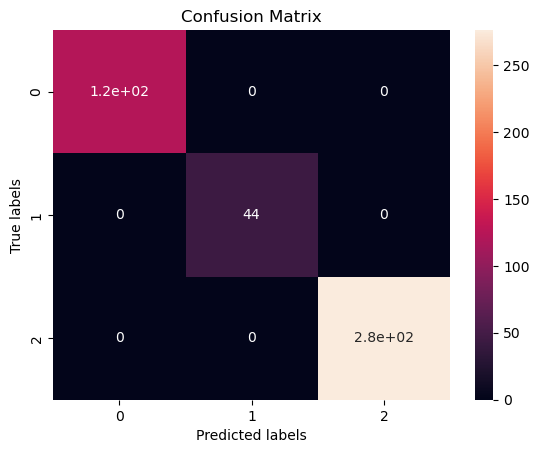

In [323]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

# PCA

In [324]:
from sklearn.decomposition import PCA

In [325]:
pca = PCA(n_components=2)

In [331]:
scaled_data = scaler.transform(data4)

In [334]:
pca.fit(scaled_data)

PCA(n_components=2)

In [330]:
scaler = StandardScaler()
scaler.fit(data4)

StandardScaler()

In [335]:
scaled_data.shape

(4424, 14)

In [338]:
x_pca.shape

(4424, 2)

In [337]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

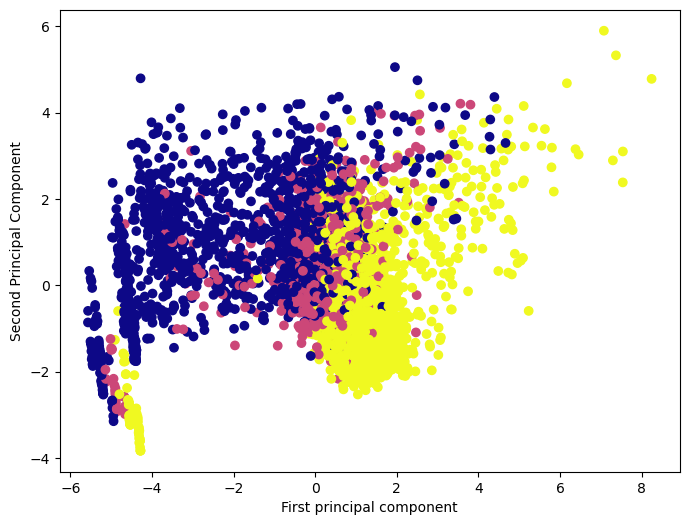

In [342]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data3['Code'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [343]:
pca.components_

array([[-0.04093059,  0.17754313, -0.01308643, -0.0116556 , -0.08076398,
         0.10849137, -0.07505797,  0.27903509,  0.41612685,  0.40605963,
         0.30557844,  0.42106079,  0.41214818,  0.29347244],
       [ 0.48171132,  0.17072206,  0.20272133,  0.06516274,  0.20201661,
        -0.2651363 ,  0.46792817,  0.38676585,  0.03097112, -0.02626496,
         0.33120121, -0.04449859, -0.07002665, -0.30917041]])